In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("profiles.csv")

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df=df.dropna(axis = 0, how = 'all')

In [6]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9509,28.0,athletic,strictly anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,"foo fighters, oasis, bloc party, doves, incubu...",my family and i all live here and i can't thin...,somewhere fun to go or something good to eat.,"studying, followed by shenanigans.","i've actually had some success on here, met so...",you've got something to say. or if there's som...,white,73.0,60000.0,medicine / health,2012-06-30-02-49,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job   

In [8]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [9]:
df=df.drop(columns=['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'],axis=1)

In [10]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status'],
      dtype='object')

Text(0, 0.5, 'Number of Profiles')

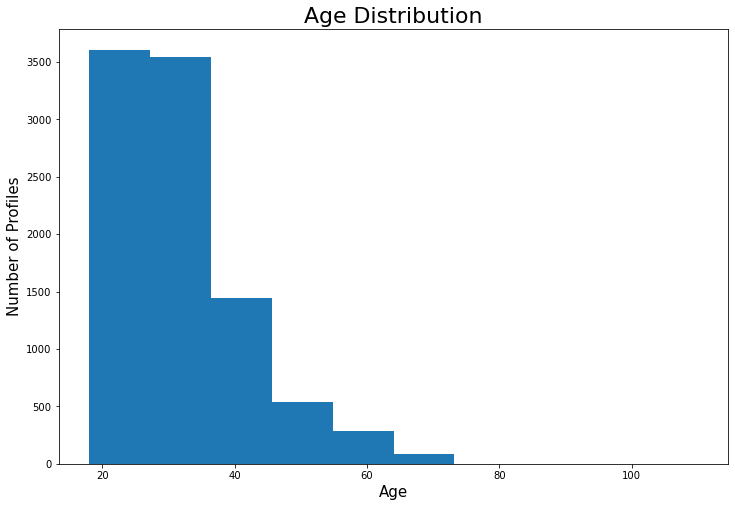

In [11]:
# Age
fig, ax = plt.subplots(1, figsize=(12,8))
plt.title('Age Distribution', fontsize = 22)
plt.hist(df.age, range=(df.age.min(), df.age.max()))
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Number of Profiles", fontsize = 15)

In [12]:
generation = []
for i in range(len(df)):
    if 18 <= df["age"].iloc[i] <= 32:
        generation.append(0)
    elif 32 < df["age"].iloc[i] <= 47:
        generation.append(1)
    else:
        generation.append(2)
df["generation"] = generation

Text(0, 0.5, 'Number of Profiles')

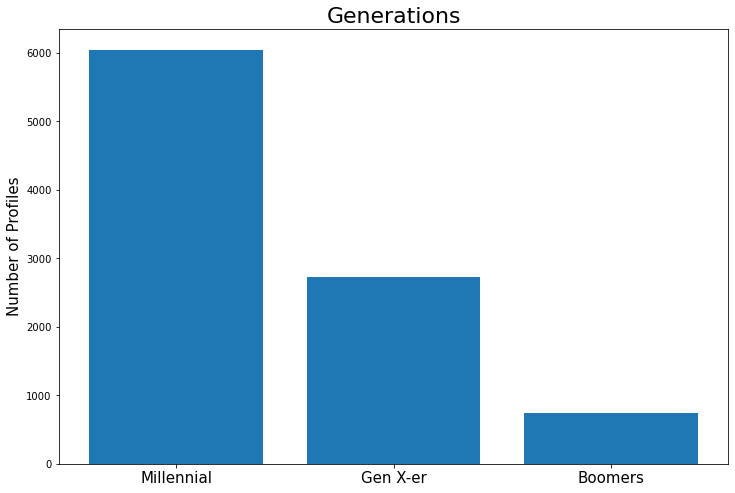

In [13]:
fig, ax = plt.subplots(1, figsize=(12,8))
plt.title('Generations', fontsize = 22)
ax.bar(df['generation'].value_counts().index,df['generation'].value_counts().values)
ax.set_xticks(range(0, 3))
ax.set_xticklabels(["Millennial","Gen X-er","Boomers"], fontsize = 15);
plt.ylabel("Number of Profiles", fontsize = 15)

In [14]:
#'body_type':848
df.body_type.unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [15]:
df.body_type.value_counts()

average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

In [16]:
df['body_type']=df['body_type'].map({'fit':'fit',
                                     'athletic':'fit',
                                     'thin':'fit',
                                     'skinny':'fit',
                                    'average':'fit',
                                    'curvy':'curvy', 
                                     'a little extra':'curvy',
                                     'full figured':'curvy',
                                    'overweight':'bad',
                                     'jacked':'bad',
                                     'used up':'bad',
                                     'rather not say':'bad'})

In [17]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
generation        0
dtype: int64

In [18]:
df['body_type'] = df['body_type'].fillna(df['body_type'].mode()[0])

<AxesSubplot:>

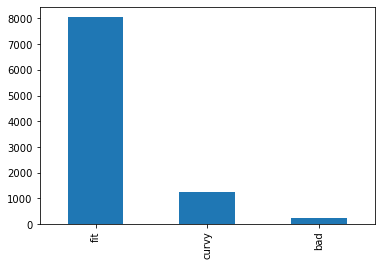

In [19]:
df.body_type.value_counts().plot.bar()

In [20]:
#diet:3753
df.diet.value_counts()

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

In [21]:
df.diet.unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

In [22]:
df['diet'].replace({'strictly ':'','mostly ':''},regex=True,inplace=True)

In [23]:
df.diet.value_counts()

anything      4523
vegetarian     814
other          270
vegan          120
halal           18
kosher          16
Name: diet, dtype: int64

In [24]:
df['diet'] = df['diet'].fillna(df['diet'].mode()[0])

In [25]:
df.diet.value_counts()

anything      8276
vegetarian     814
other          270
vegan          120
halal           18
kosher          16
Name: diet, dtype: int64

<AxesSubplot:>

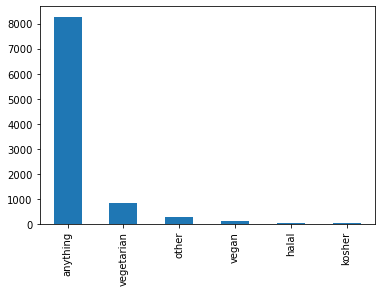

In [26]:
df.diet.value_counts().plot.bar()

In [27]:
#drinks:502
df.drinks.value_counts()

socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: drinks, dtype: int64

In [28]:
df['drinks'] = df['drinks'].fillna(df['drinks'].mode()[0])

<AxesSubplot:>

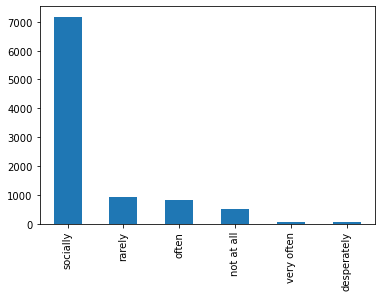

In [29]:
df.drinks.value_counts().plot.bar()

In [30]:
#drugs:2299
df.drugs.value_counts()

never        5972
sometimes    1181
often          62
Name: drugs, dtype: int64

In [31]:
df['drugs'] = df['drugs'].fillna(df['drugs'].mode()[0])

<AxesSubplot:>

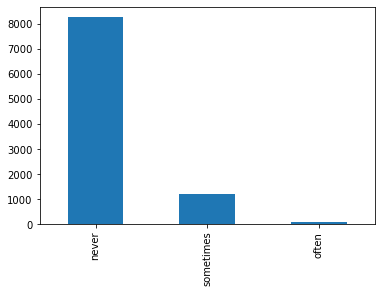

In [32]:
df.drugs.value_counts().plot.bar()

In [33]:
#education:1055
df.education.value_counts()

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [34]:
df['education'].replace({'working':'student','graduated from':'graduated','dropped out':'dropped'},inplace=True)
df['education']=df['education'].str.split().str[0]
df['education'].replace({'college/university':'graduated','two-year':'graduated','space':'graduated','masters':'graduated','high':'graduated','ph.d':'graduated','law':'graduated'},inplace=True)

In [35]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [36]:
df.education.value_counts()

graduated    7464
working      1727
dropped       323
Name: education, dtype: int64

<AxesSubplot:>

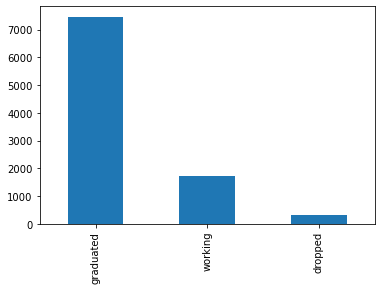

In [37]:
df.education.value_counts().plot.bar()

<AxesSubplot:>

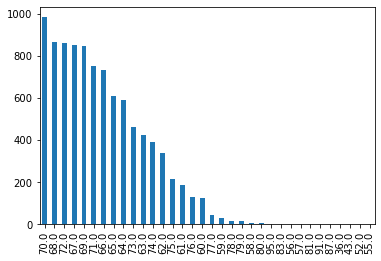

In [38]:
#height            0
df.height.value_counts().plot.bar()

<AxesSubplot:>

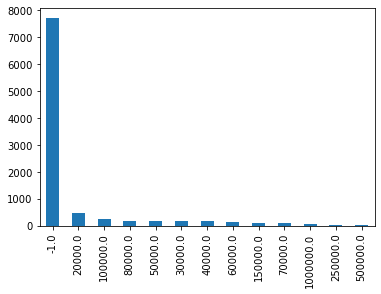

In [39]:
#income:0
df.income.value_counts().plot.bar()

In [40]:
#ethnicity:949
df.ethnicity.value_counts()

white                                                                5278
asian                                                                 863
hispanic / latin                                                      426
black                                                                 326
other                                                                 319
                                                                     ... 
native american, pacific islander, hispanic / latin, white, other       1
indian, pacific islander                                                1
asian, middle eastern, black                                            1
asian, middle eastern, indian                                           1
middle eastern, hispanic / latin, white, other                          1
Name: ethnicity, Length: 112, dtype: int64

In [41]:
df.drop(["ethnicity"],axis=1,inplace=True)

In [42]:
#job:1331
df.job.value_counts()

other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: job, dtype: int64

In [43]:
df.drop(["job"],axis=1,inplace=True)

In [44]:
#last_online       0

In [45]:
#location          0

In [46]:
#offspring      5628
df.offspring.value_counts()

doesn&rsquo;t have kids                                1224
doesn&rsquo;t have kids, but might want them            620
doesn&rsquo;t have kids, but wants them                 578
doesn&rsquo;t want kids                                 454
has a kid                                               304
has kids                                                291
doesn&rsquo;t have kids, and doesn&rsquo;t want any     172
has kids, but doesn&rsquo;t want more                    68
has a kid, but doesn&rsquo;t want more                   41
has a kid, and might want more                           36
wants kids                                               29
might want kids                                          28
has kids, and might want more                            24
has a kid, and wants more                                12
has kids, and wants more                                  5
Name: offspring, dtype: int64

In [47]:
df.drop(["offspring"],axis=1,inplace=True)

<AxesSubplot:>

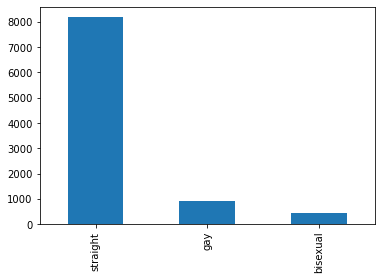

In [48]:
#orientation       0
df.orientation.value_counts().plot.bar()

In [49]:
#pets           3162
df.drop(["pets"],axis=1,inplace=True)

In [50]:
#religion       3253
df.religion.value_counts()

agnosticism                                   448
other                                         417
agnosticism but not too serious about it      400
agnosticism and laughing about it             386
catholicism but not too serious about it      367
atheism                                       363
atheism and laughing about it                 329
other and laughing about it                   325
christianity but not too serious about it     320
christianity                                  297
other but not too serious about it            243
judaism but not too serious about it          232
atheism but not too serious about it          200
catholicism                                   165
atheism and somewhat serious about it         138
christianity and somewhat serious about it    133
other and somewhat serious about it           122
catholicism and laughing about it             117
judaism and laughing about it                 113
agnosticism and somewhat serious about it     105


In [51]:
df["religion"]=df["religion"].str.split().str[0]
df['religion'] = df['religion'].fillna(df['religion'].mode()[0])
df.religion.value_counts()

agnosticism     4634
other           1193
atheism         1131
christianity     905
catholicism      762
judaism          490
buddhism         288
hinduism          82
islam             29
Name: religion, dtype: int64

<AxesSubplot:>

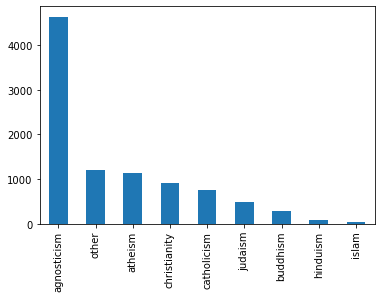

In [52]:
df.religion.value_counts().plot.bar()

<AxesSubplot:>

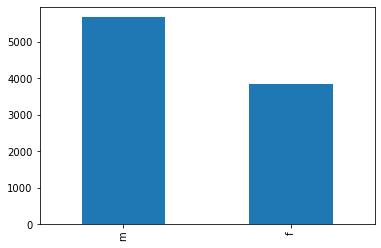

In [53]:
#sex               0
df.sex.value_counts().plot.bar()

In [54]:
#sign           1738
df.sign.value_counts()

leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter       

In [55]:
df["sign"]=df["sign"].str.split().str[0]
df['sign'] = df['sign'].fillna(df['sign'].mode()[0])
df.sign.value_counts()

leo            2445
aries           680
cancer          677
gemini          676
aquarius        674
taurus          663
virgo           660
libra           648
scorpio         632
pisces          627
sagittarius     604
capricorn       528
Name: sign, dtype: int64

<AxesSubplot:>

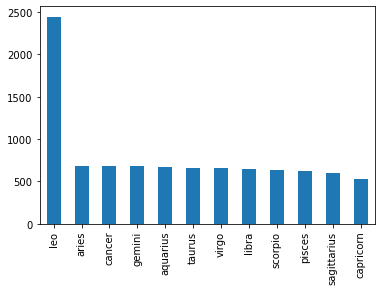

In [56]:
df.sign.value_counts().plot.bar()

In [57]:
#smokes          918
df.smokes.value_counts()

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

In [58]:
df["smokes"] = df["smokes"].map({"no":0, "trying to quit":1, "sometimes":1, "when drinking":1, "yes":1})

In [59]:
df['smokes'] = df['smokes'].fillna(df['smokes'].mode()[0])

<AxesSubplot:>

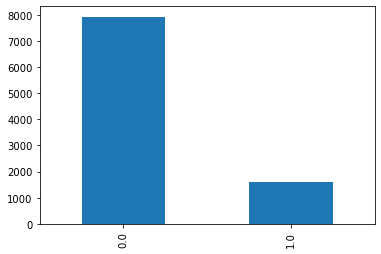

In [60]:
df.smokes.value_counts().plot.bar()

In [61]:
#speaks            6
df.speaks.value_counts()

english                                                                                3415
english (fluently)                                                                     1106
english (fluently), spanish (okay)                                                      322
english (fluently), spanish (poorly)                                                    321
english (fluently), spanish (fluently)                                                  195
                                                                                       ... 
english (fluently), hindi (fluently), spanish (okay)                                      1
english (fluently), danish (fluently), spanish (okay), german (poorly)                    1
english (fluently), spanish (fluently), portuguese                                        1
english (fluently), arabic (fluently), spanish (okay), urdu (okay), gujarati (okay)       1
english (fluently), french (okay), swedish (poorly)                             

In [62]:
df.drop(["speaks"],axis=1,inplace=True)

In [63]:
df.isnull().sum()

age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
height         0
income         0
last_online    0
location       0
orientation    0
religion       0
sex            0
sign           0
smokes         0
status         0
generation     0
dtype: int64

In [64]:
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,orientation,religion,sex,sign,smokes,status,generation
0,22.0,curvy,anything,socially,never,working,75.0,-1.0,2012-06-28-20-30,"south san francisco, california",straight,agnosticism,m,gemini,1.0,single,0
1,35.0,fit,other,often,sometimes,working,70.0,80000.0,2012-06-29-21-41,"oakland, california",straight,agnosticism,m,cancer,0.0,single,1
2,38.0,fit,anything,socially,never,graduated,68.0,-1.0,2012-06-27-09-10,"san francisco, california",straight,agnosticism,m,pisces,0.0,available,1
3,23.0,fit,vegetarian,socially,never,working,71.0,20000.0,2012-06-28-14-22,"berkeley, california",straight,agnosticism,m,pisces,0.0,single,0
4,29.0,fit,anything,socially,never,graduated,66.0,-1.0,2012-06-27-21-26,"san francisco, california",straight,agnosticism,m,aquarius,0.0,single,0


In [65]:
df.tail()

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,orientation,religion,sex,sign,smokes,status,generation
9509,28.0,fit,anything,socially,never,working,73.0,60000.0,2012-06-30-02-49,"san francisco, california",straight,christianity,m,aries,0.0,single,0
9510,31.0,fit,anything,socially,sometimes,graduated,72.0,-1.0,2012-04-05-21-46,"san francisco, california",gay,atheism,m,scorpio,1.0,single,0
9511,34.0,fit,anything,socially,never,dropped,71.0,-1.0,2012-04-28-12-42,"san francisco, california",gay,atheism,m,leo,1.0,single,1
9512,29.0,fit,anything,rarely,never,graduated,70.0,-1.0,2012-03-01-15-17,"san francisco, california",gay,agnosticism,m,aries,0.0,single,0
9513,49.0,bad,anything,rarely,never,graduated,64.0,-1.0,2012-06-14-15-14,"castro valley, california",straight,agnosticism,f,pisces,0.0,single,2


In [66]:
df.corr()

,age,height,income,smokes,generation
age,1.000000,-0.022078,0.011424,-0.147282,0.904987
height,-0.022078,1.000000,0.073105,0.035629,-0.034848
income,0.011424,0.073105,1.000000,0.039872,0.007773
smokes,-0.147282,0.035629,0.039872,1.000000,-0.133156
generation,0.904987,-0.034848,0.007773,-0.133156,1.000000


In [67]:
df.describe()

,age,height,income,smokes,generation
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155,0.166597,0.442821
std,9.445488,3.905229,91428.807808,0.372635,0.635291
min,18.000000,36.000000,-1.000000,0.000000,0.000000
25%,25.000000,66.000000,-1.000000,0.000000,0.000000
50%,30.000000,68.000000,-1.000000,0.000000,0.000000
75%,36.000000,71.000000,-1.000000,0.000000,1.000000
max,110.000000,95.000000,1000000.000000,1.000000,2.000000


<AxesSubplot:>

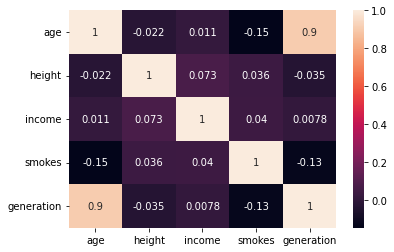

In [68]:
sns.heatmap(df.corr(),annot=True)

In [69]:
!pip install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached lightgbm-3.3.3-py3-none-win_amd64.whl (1.0 MB)
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached numba-0.54.1-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached mlflow-2.0.1-py3-none-any.whl (16.5 MB)
  Using cached PyYAML-5.4.1-cp39-cp39-win_amd64.whl (213 kB)
  Using cached pyod-1.0.6-py3-none-any.whl
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached pycaret-2.3.9-py3-none-any.whl (319 kB)
  Using cached pycaret-2.3.8-py3-none-any.whl (318 kB)
  Using cached pycaret-2.3.7-py

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\T\anaconda3\python.exe' 'C:\Users\T\AppData\Local\Temp\pip-standalone-pip-bvhsq569\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\T\AppData\Local\Temp\pip-build-env-klai12e3\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_syste


  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached docker-6.0.1-py3-none-any.whl (147 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached databricks_cli-0.17.3-py3-none-any.whl
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached pywin32-305-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached sklearn-0.0.post1-py3-none-any.whl
  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached cymem-2.0.7-cp39-cp39-win_amd64.whl (30 kB)
  Using cached spacy_legacy-3.0.10-py2.py3-none-any.whl (21 kB)
  Using cached pathy-0.10.0-py3-none-any.whl (48 kB)
  Using cached thinc-8.1.5-cp39-cp39-


    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\Users\T\anaconda3\libs
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries satlas,satlas not found in C:\Users\T\anaconda3\libs
    <class 'numpy.distutils.system_info.atlas_3_10_info'>
      NOT AVAILABLE
  
    atlas_threads_info:
    Setting PTATLAS=ATLAS
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\Users\T\anaconda3\lib
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries ptf77blas,ptcblas,atlas not found in C:\Users\T\anaconda3\lib
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    cust

In [70]:
from pycaret.regression import *
exp_name=setup(data=df,target='age')

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
best_model=compare_models(sort='R2')

In [ ]:
df=df.drop('age',axis=1)

In [ ]:
from pycaret.classification import *
exp_name=setup(data=df,target='generation')

In [ ]:
best_model=compare_models()